# Final Project Nautictech

## Import Library

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import keras
import nltk
import scipy.stats as stats
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
from plotly.subplots import make_subplots
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from transformers import pipeline
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer

nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /Users/tatas/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/tatas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Data Preparation

In [2]:
df_train = pd.read_csv('Data/Ford Sentence Classifiaction Dataset/train_data.csv')
df_test = pd.read_csv('Data/Ford Sentence Classifiaction Dataset/test_data.csv')
df_sample = pd.read_csv('Data/Ford Sentence Classifiaction Dataset/sample_submission.csv')

In [3]:
df_sample

,Sentence_id,Type
0,GERRES15609,Responsibility
1,PHERES15784,Responsibility
2,GERREQ10457,Requirement
3,GERSKL27235,Skill
4,HONSSK18415,SoftSkill


In [4]:
df_train.head()

,Unnamed: 0,Sentence_id,New_Sentence,Type
0,0,GERRES15609,Author and/or Review architecture/design and o...,Responsibility
1,1,PHERES15784,Should be able to develop custom dynamic shape...,Responsibility
2,2,GERREQ10457,Experience in working crosslly with a larger ...,Requirement
3,3,GERSKL27235,"Previous business experience, including but no...",Skill
4,4,HONSSK18415,Delivering fast and right the first time.,SoftSkill


In [5]:
df_test.head()

,Unnamed: 0,Sentence_id,New_Sentence
0,0,UAERES16346,Collaborate across all of DB&T practices and o...
1,1,COGREQ15586,Strong technology expertise in Identity and A...
2,2,UAEREQ12722,Strong knowledge on Service Virtualization.
3,3,COGSKL29155,Architect scalable data processing and analyti...
4,4,PHERES12551,"Map client organization, build outstanding rel..."


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15029 entries, 0 to 15028
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    15029 non-null  int64 
 1   Sentence_id   15029 non-null  object
 2   New_Sentence  14748 non-null  object
dtypes: int64(1), object(2)
memory usage: 352.4+ KB


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60115 entries, 0 to 60114
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    60115 non-null  int64 
 1   Sentence_id   60115 non-null  object
 2   New_Sentence  59002 non-null  object
 3   Type          60115 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.8+ MB


In [8]:
#lowercase
df_train['New_Sentence'] = df_train['New_Sentence'].str.lower()
df_train['Type'] = df_train['Type'].str.lower()
df_test['New_Sentence'] = df_test['New_Sentence'].str.lower()

In [9]:
df_train.head()

,Unnamed: 0,Sentence_id,New_Sentence,Type
0,0,GERRES15609,author and/or review architecture/design and o...,responsibility
1,1,PHERES15784,should be able to develop custom dynamic shape...,responsibility
2,2,GERREQ10457,experience in working crosslly with a larger ...,requirement
3,3,GERSKL27235,"previous business experience, including but no...",skill
4,4,HONSSK18415,delivering fast and right the first time.,softskill


In [10]:
df_test.head()

,Unnamed: 0,Sentence_id,New_Sentence
0,0,UAERES16346,collaborate across all of db&t practices and o...
1,1,COGREQ15586,strong technology expertise in identity and a...
2,2,UAEREQ12722,strong knowledge on service virtualization.
3,3,COGSKL29155,architect scalable data processing and analyti...
4,4,PHERES12551,"map client organization, build outstanding rel..."


## Exploration Data Analys

### check information data

In [11]:
df_train_eda = df_train.copy()
df_test_eda = df_test.copy()

In [12]:
# hitung missing value
print('Missing value in train data')
print(df_train_eda.isnull().sum())
print('Missing value in test data')
print(df_test_eda.isnull().sum())

Missing value in train data
Unnamed: 0         0
Sentence_id        0
New_Sentence    1113
Type               0
dtype: int64
Missing value in test data
Unnamed: 0        0
Sentence_id       0
New_Sentence    281
dtype: int64


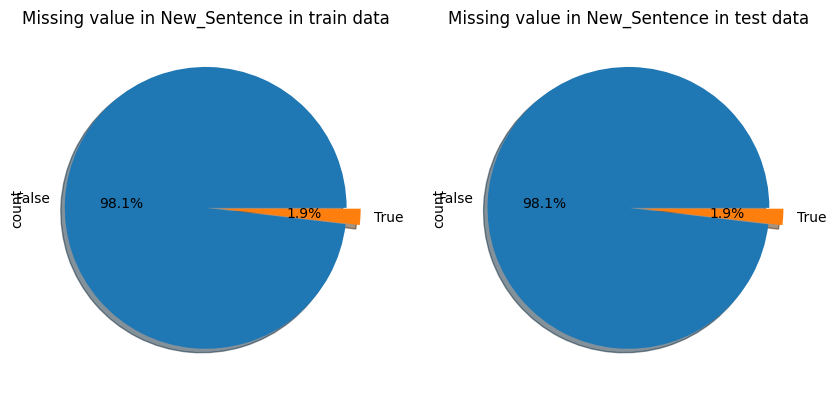

In [13]:
# visualisasi missing value di kolom  New_Sentence di train data dan test data dengan pie chart
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df_train_eda['New_Sentence'].isnull().value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)
plt.title('Missing value in New_Sentence in train data')
plt.subplot(1,2,2)
df_test_eda['New_Sentence'].isnull().value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)
plt.title('Missing value in New_Sentence in test data')
plt.show()

### check more insight data

In [14]:
# Menambahkan kolom panjang karakter
df_train_eda['Length'] = df_train_eda['New_Sentence'].str.len()

# Menampilkan 5 data teratas
print(df_train_eda[['New_Sentence', 'Length']].head())

                                        New_Sentence  Length
0  author and/or review architecture/design and o...   173.0
1  should be able to develop custom dynamic shape...   104.0
2  experience in working crosslly with a  larger ...   105.0
3  previous business experience, including but no...   150.0
4         delivering fast and right the first  time.    42.0


In [15]:
#remove stopwords
stop = stopwords.words('english')
df_train_eda['New_Sentence'] = df_train_eda['New_Sentence'].fillna('').apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_test_eda['New_Sentence'] = df_test_eda['New_Sentence'].fillna('').apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [16]:
#remove punctuation
df_train_eda['New_Sentence'] = df_train_eda['New_Sentence'].str.replace('[^\w\s]','', regex=True)
df_test_eda['New_Sentence'] = df_test_eda['New_Sentence'].str.replace('[^\w\s]','', regex=True)


In [17]:
# count word frequency
def count_words(df):
    words = []
    for i in range(len(df)):
        sentence = df.iloc[i]['New_Sentence']
        if isinstance(sentence, float):
            sentence = ''
        words += sentence.split()
    return Counter(words)

train_words = count_words(df_train_eda)
test_words = count_words(df_test_eda)

train_words.most_common(10)

[('experience', 16071),
 ('years', 8132),
 ('skills', 5234),
 ('ability', 4872),
 ('management', 4694),
 ('business', 4641),
 ('engineering', 4207),
 ('degree', 3717),
 ('work', 3664),
 ('knowledge', 3499)]

In [18]:
test_words.most_common(10)

[('experience', 4003),
 ('years', 2068),
 ('skills', 1334),
 ('management', 1194),
 ('ability', 1193),
 ('business', 1149),
 ('engineering', 1036),
 ('degree', 963),
 ('work', 902),
 ('knowledge', 849)]

In [19]:
# remove common words
common_words = set([word for word, freq in train_words.most_common(10)])
df_train_eda['New_Sentence'] = df_train_eda['New_Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in common_words))
df_test_eda['New_Sentence'] = df_test_eda['New_Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in common_words))

In [20]:
# count word frequency after removing common words
train_words = count_words(df_train_eda)
test_words = count_words(df_test_eda)

train_words.most_common(10)

[('development', 3258),
 ('team', 3106),
 ('strong', 2895),
 ('project', 2743),
 ('technical', 2678),
 ('design', 2501),
 ('data', 2442),
 ('customer', 2387),
 ('working', 2282),
 ('support', 2229)]

### common word

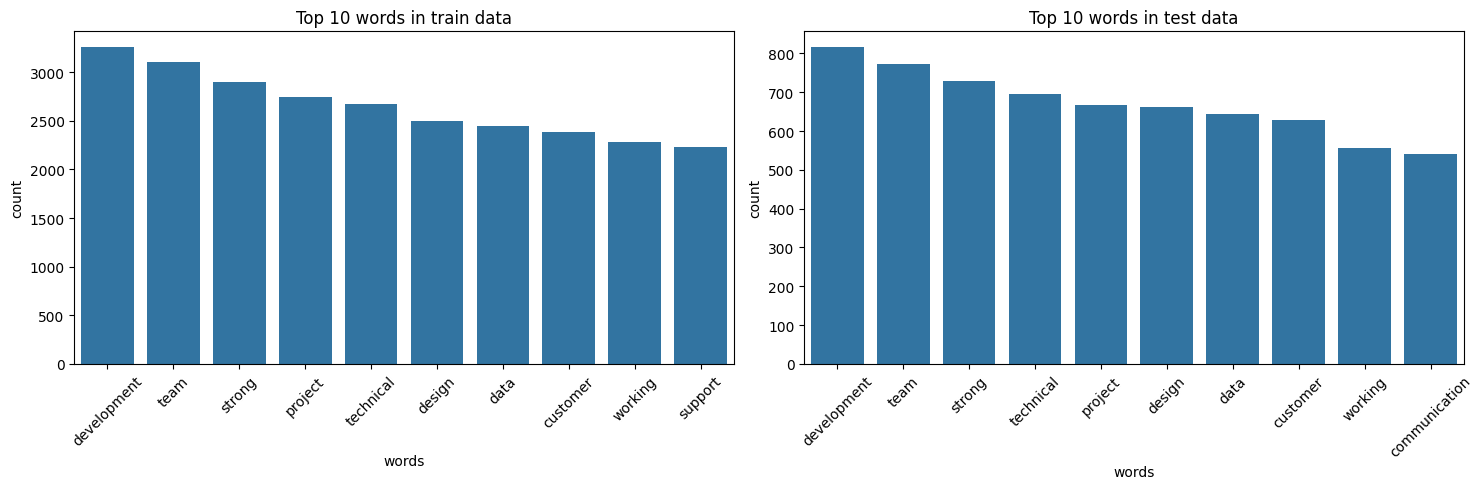

In [21]:
# Membuat visualisasi
train_words_df = pd.DataFrame(train_words.most_common(10), columns=['words', 'count'])
test_words_df = pd.DataFrame(test_words.most_common(10), columns=['words', 'count'])

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot untuk data train
sns.barplot(x='words', y='count', data=train_words_df, ax=ax[0])
ax[0].set_title('Top 10 words in train data')
ax[0].tick_params(axis='x', rotation=45)  # Memutar label sumbu-x

# Plot untuk data test
sns.barplot(x='words', y='count', data=test_words_df, ax=ax[1])
ax[1].set_title('Top 10 words in test data')
ax[1].tick_params(axis='x', rotation=45)  # Memutar label sumbu-x

plt.tight_layout()  # Menyesuaikan tata letak agar tidak tumpang tindih
plt.show()


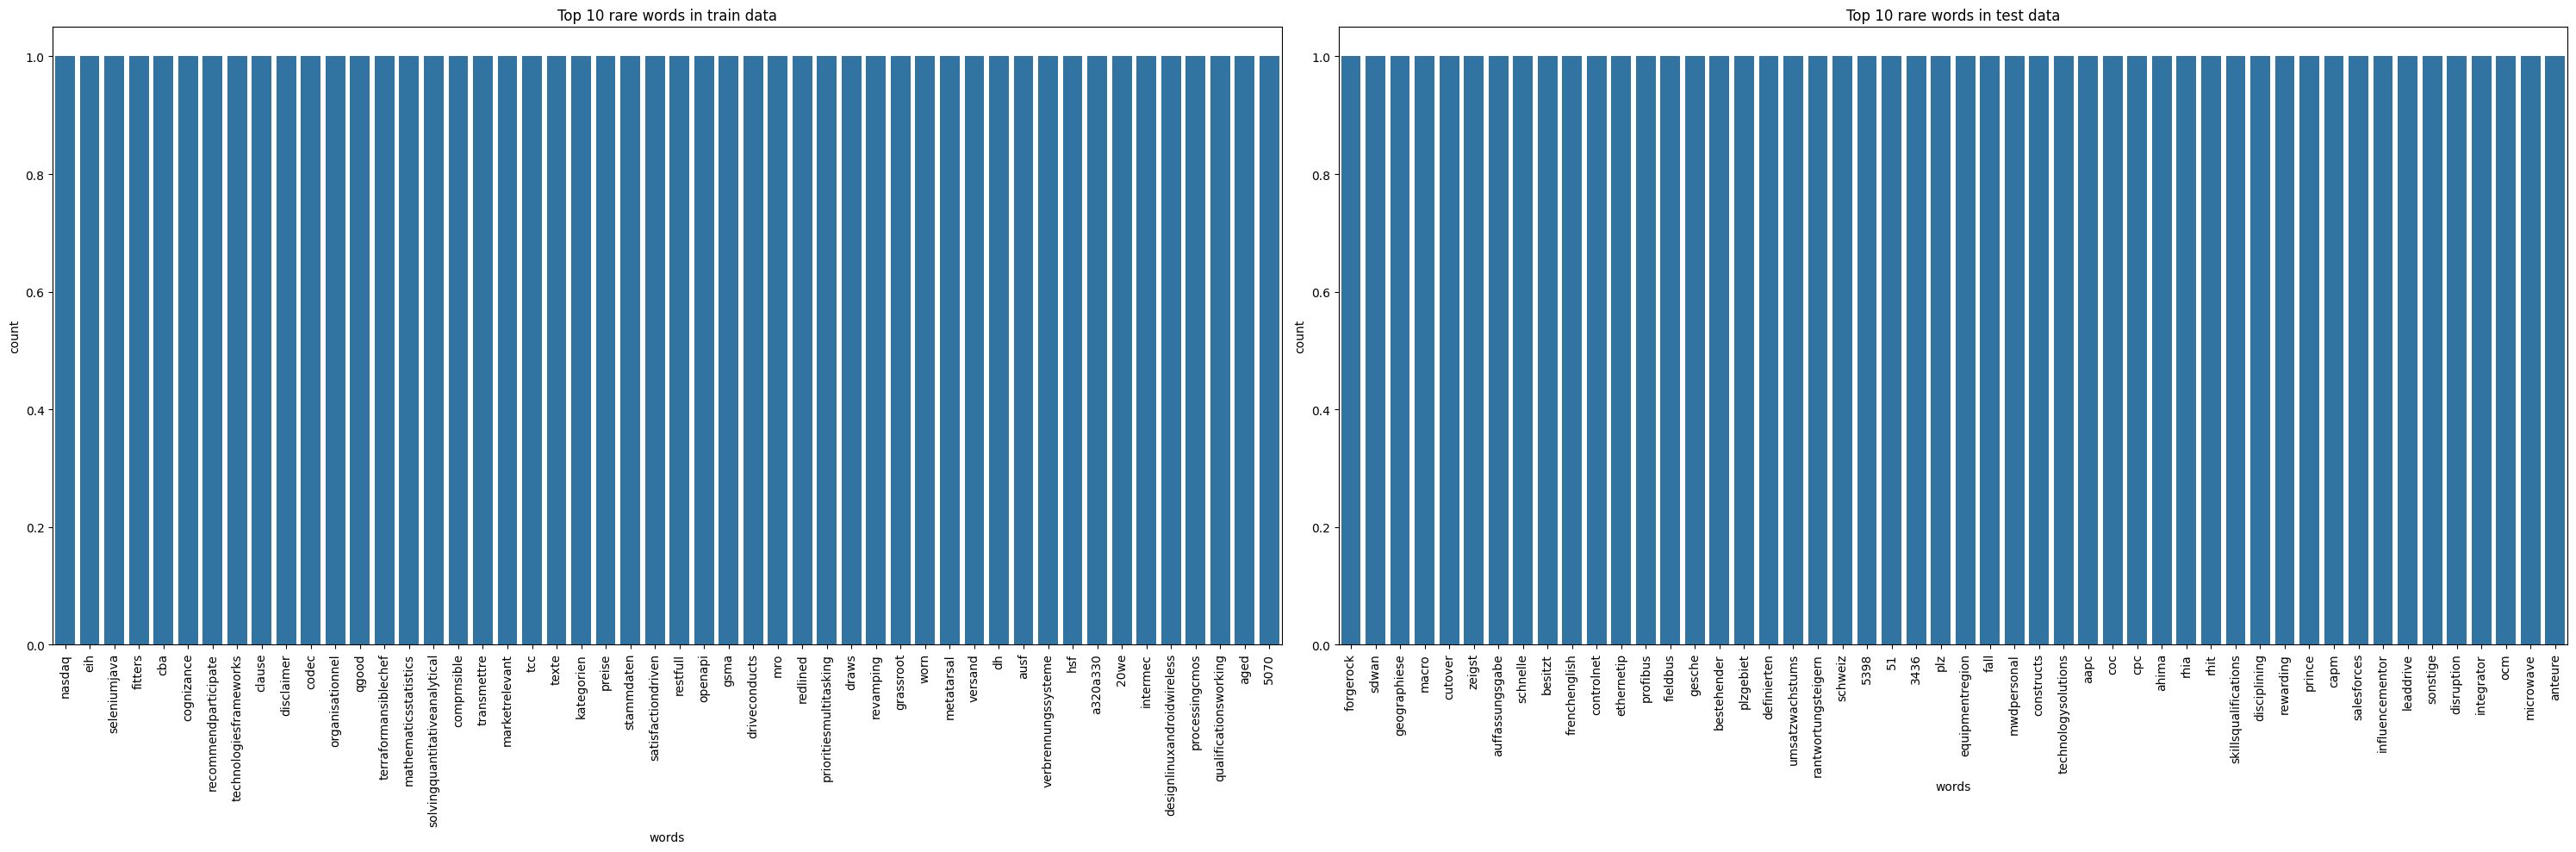

In [22]:
# Membuat visualisasi untuk kata yang jarang muncul
train_words_df = pd.DataFrame(train_words.most_common()[:-51:-1], columns=['words', 'count'])
test_words_df = pd.DataFrame(test_words.most_common()[:-51:-1], columns=['words', 'count'])

# Membuat visualisasi agar lebih mudah dibaca atas dan bawah
fig, ax = plt.subplots(1, 2, figsize=(30, 10))

# Plot untuk data train
sns.barplot(x='words', y='count', data=train_words_df, ax=ax[0])
ax[0].set_title('Top 10 rare words in train data')
ax[0].tick_params(axis='x', rotation=90)  # Memutar label

# Plot untuk data test
sns.barplot(x='words', y='count', data=test_words_df, ax=ax[1])
ax[1].set_title('Top 10 rare words in test data')
ax[1].tick_params(axis='x', rotation=90)  # Memutar label

plt.tight_layout()  # Menyesuaikan tata letak agar tidak tumpang tindih
plt.show()


### number in data

In [23]:
# check angka yang ada pada data train dan data test
def hasNumbers(inputString):
    return any(char.isdigit() for char in inputString)

def count_numbers(df):
    numbers = []
    for i in range(len(df)):
        sentence = df.iloc[i]['New_Sentence']
        if isinstance(sentence, float):
            sentence = ''
        numbers += [w for w in sentence if hasNumbers(w)]
    return Counter(numbers)

train_numbers = count_numbers(df_train_eda)
test_numbers = count_numbers(df_test_eda)

train_numbers.most_common()

[('5', 3568),
 ('1', 3531),
 ('2', 3507),
 ('0', 2984),
 ('3', 2919),
 ('4', 1399),
 ('8', 1186),
 ('6', 1072),
 ('7', 1059),
 ('9', 755)]

In [24]:
test_numbers.most_common()

[('5', 888),
 ('1', 883),
 ('2', 841),
 ('0', 733),
 ('3', 719),
 ('4', 353),
 ('8', 318),
 ('6', 278),
 ('7', 277),
 ('9', 199)]

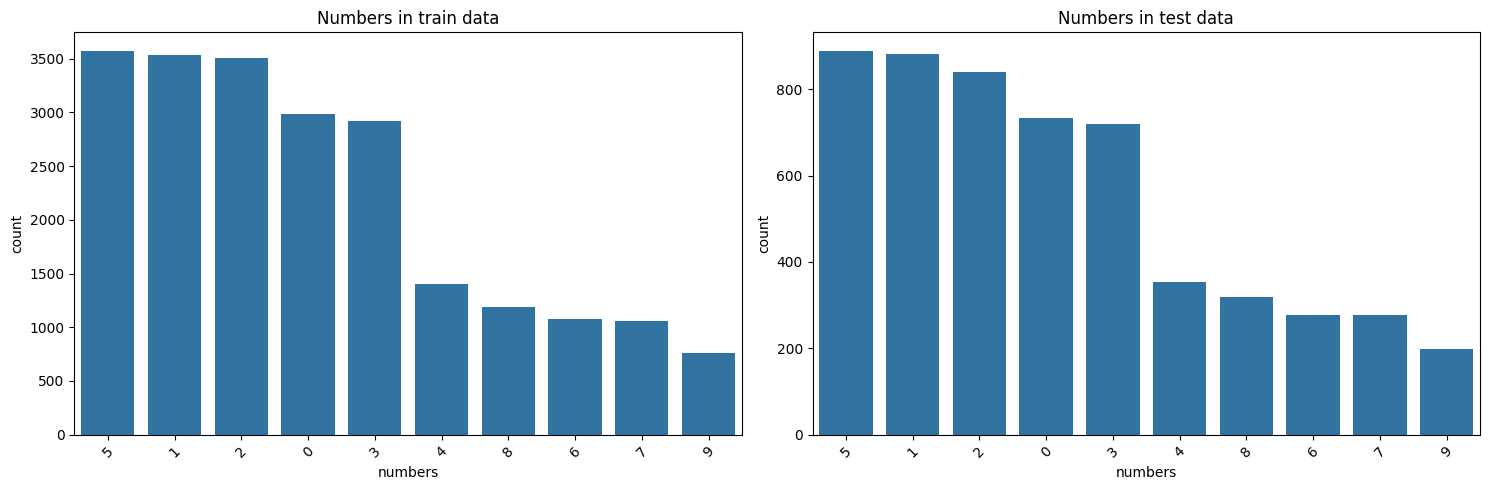

In [25]:
# visualisasi angka yang ada pada data train dan data test
train_numbers_df = pd.DataFrame(train_numbers.most_common(), columns=['numbers', 'count'])
test_numbers_df = pd.DataFrame(test_numbers.most_common(), columns=['numbers', 'count'])

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot untuk data train
sns.barplot(x='numbers', y='count', data=train_numbers_df, ax=ax[0])
ax[0].set_title('Numbers in train data')
ax[0].tick_params(axis='x', rotation=45)  # Memutar label sumbu-x

# Plot untuk data test
sns.barplot(x='numbers', y='count', data=test_numbers_df, ax=ax[1])
ax[1].set_title('Numbers in test data')
ax[1].tick_params(axis='x', rotation=45)  # Memutar label sumbu-x

plt.tight_layout()  # Menyesuaikan tata letak agar tidak tumpang tindih
plt.show()

In [26]:
# tampilkan New_Sentence yang mengandung angka
print("Data train yang mengandung angka:")
display(df_train_eda[df_train_eda['New_Sentence'].str.contains(r'\d', regex=True)])
print("Data test yang mengandung angka:")
display(df_test_eda[df_test_eda['New_Sentence'].str.contains(r'\d', regex=True)])


Data train yang mengandung angka:


,Unnamed: 0,Sentence_id,New_Sentence,Type,Length
8,8,UAEREQ4612,covid19 travel manufacturing sites ohio nebras...,requirement,102.0
15,15,INDEXP21173,working 5,experience,29.0
24,24,INDEDU45986,bebtech memtech phd minimum 12 electronics maj...,education,106.0
29,29,PHEEXP10060,minimum 6 hr 4 ld preferably industry,experience,93.0
30,30,COGEXP38011,minimum 8 information security including minim...,experience,147.0
...,...,...,...,...,...
60089,60089,HONSKL14221,strong office 360,skill,29.0
60090,60090,INDEXP128,minimum 10 space production environment,experience,68.0
60099,60099,COGEXP764,minimum 4 working analysis,experience,62.0
60109,60109,GEREXP44376,6 industry process controls,experience,54.0


Data test yang mengandung angka:


,Unnamed: 0,Sentence_id,New_Sentence
10,10,COGREQ33777,excellent digital design good understanding di...
14,14,UAEREQ30316,drive culture high performance operational exc...
16,16,PHEEXP5310,5 ormb implementation required
19,19,COGREQ29517,c3c4 oleflex technologies technical support op...
25,25,COGEXP222,minimum 10 working directly materials process ...
...,...,...,...
15004,15004,COGEXP3132,must solid 1 contact center exp xa7
15007,15007,GEREXP10232,area sales manager mwdpersonal fall protective...
15021,15021,COGEXP9120,3 4 guidewire integration configuration claims...
15023,15023,UAEEXP12629,least two automotive software development comb...


In [27]:
# Dari data yang ditampilkan di atas, terdapat beberapa kalimat yang mengandung angka. Kita tampilkan yang bertipe experience
print("Data train yang mengandung angka dan bertipe experience:")
display(df_train_eda[(df_train_eda['New_Sentence'].str.contains(r'\d', regex=True)) & (df_train_eda['Type'] == 'experience')])

Data train yang mengandung angka dan bertipe experience:


,Unnamed: 0,Sentence_id,New_Sentence,Type,Length
15,15,INDEXP21173,working 5,experience,29.0
29,29,PHEEXP10060,minimum 6 hr 4 ld preferably industry,experience,93.0
30,30,COGEXP38011,minimum 8 information security including minim...,experience,147.0
35,35,GEREXP21708,qualifications qualified candidate have 15 han...,experience,219.0
39,39,INDEXP29202,1 planning manufacturing environment,experience,62.0
...,...,...,...,...,...
60081,60081,GEREXP48468,2 knowledgeexperience printed board assembly p...,experience,89.0
60088,60088,GEREXP15385,least 15 consulting including leading consulti...,experience,243.0
60090,60090,INDEXP128,minimum 10 space production environment,experience,68.0
60099,60099,COGEXP764,minimum 4 working analysis,experience,62.0


In [28]:
# Dari data yang ditampilkan di atas, terdapat beberapa kalimat yang mengandung angka dan bertipe experience. lalu tampilkan yang bukan bertipe experience
print("Data train yang mengandung angka dan bukan bertipe experience:")
display(df_train_eda[(df_train_eda['New_Sentence'].str.contains(r'\d', regex=True)) & (df_train_eda['Type'] != 'experience')])

Data train yang mengandung angka dan bukan bertipe experience:


,Unnamed: 0,Sentence_id,New_Sentence,Type,Length
8,8,UAEREQ4612,covid19 travel manufacturing sites ohio nebras...,requirement,102.0
24,24,INDEDU45986,bebtech memtech phd minimum 12 electronics maj...,education,106.0
60,60,COGRES26168,gr en permanence un calendrier principal et co...,responsibility,100.0
84,84,PHESKL2815,aws integration ie s3 lambda,skill,34.0
107,107,GERSSK815,diriger la fermeture rapide et efficace de tou...,softskill,75.0
...,...,...,...,...,...
60005,60005,UAESKL10768,conhecimento de openapi 3 swagger ui api first...,skill,76.0
60053,60053,GERRES49204,finding debugging malfunctioning programs affe...,responsibility,167.0
60059,60059,HONSSK27738,capacitxe9 avxe9rxe9e xe0 faciliter le changem...,softskill,170.0
60089,60089,HONSKL14221,strong office 360,skill,29.0


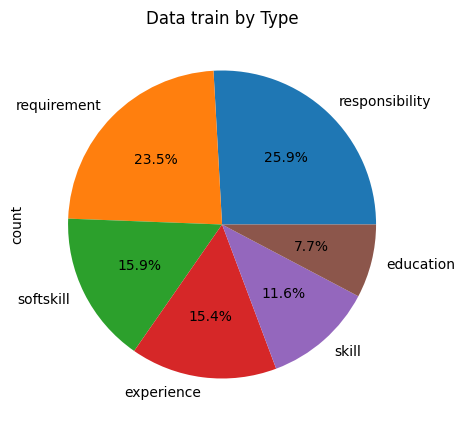

In [29]:
# visualisasi data train berdasarkan tipe pie chart
plt.figure(figsize=(5, 5))
df_train['Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Data train by Type')
plt.show()

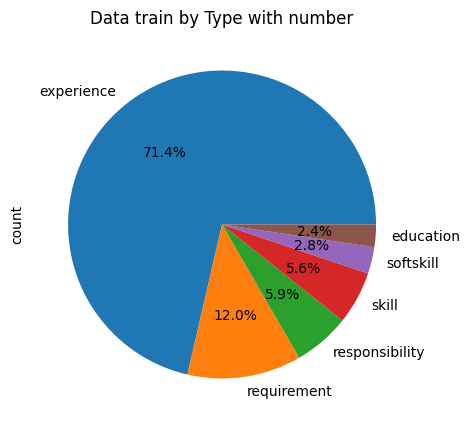

In [30]:
# visualisasi data train berdasarkan tipe dan mengandung angka pie chart
plt.figure(figsize=(5, 5))
df_train[(df_train_eda['New_Sentence'].str.contains(r'\d', regex=True))]['Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Data train by Type with number')
plt.show()

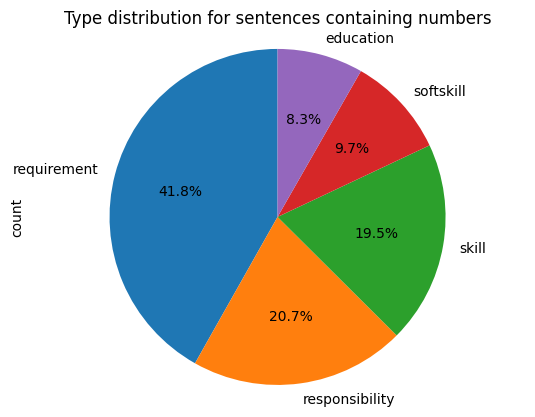

In [31]:
#visualisasi data terdapat beberapa kalimat yang mengandung angka dan yang bukan bertipe experience
df_vis = df_train_eda[(df_train_eda['New_Sentence'].str.contains(r'\d', regex=True)) & (df_train_eda['Type'] != 'experience')]
df_vis['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Type distribution for sentences containing numbers')
plt.axis('equal')
plt.show()


In [32]:
# hitung data yang mengandung angka dan bukan bertipe experience pisahkan berdasarkan tipe
print("Jumlah data train yang mengandung angka dan bukan bertipe experience:")
print(df_train_eda[(df_train_eda['New_Sentence'].str.contains(r'\d', regex=True)) & (df_train_eda['Type'] != 'experience')]['Type'].value_counts())

Jumlah data train yang mengandung angka dan bukan bertipe experience:
Type
requirement       1397
responsibility     692
skill              650
softskill          325
education          276
Name: count, dtype: int64


In [33]:
# hitung data yang mengandung angka dan bertipe experience pisahkan berdasarkan tipe
print("Jumlah data train yang mengandung angka dan bertipe experience:")
print(df_train_eda[(df_train_eda['New_Sentence'].str.contains(r'\d', regex=True)) & (df_train_eda['Type'] == 'experience')]['Type'].value_counts())


Jumlah data train yang mengandung angka dan bertipe experience:
Type
experience    8334
Name: count, dtype: int64


### uncommon word

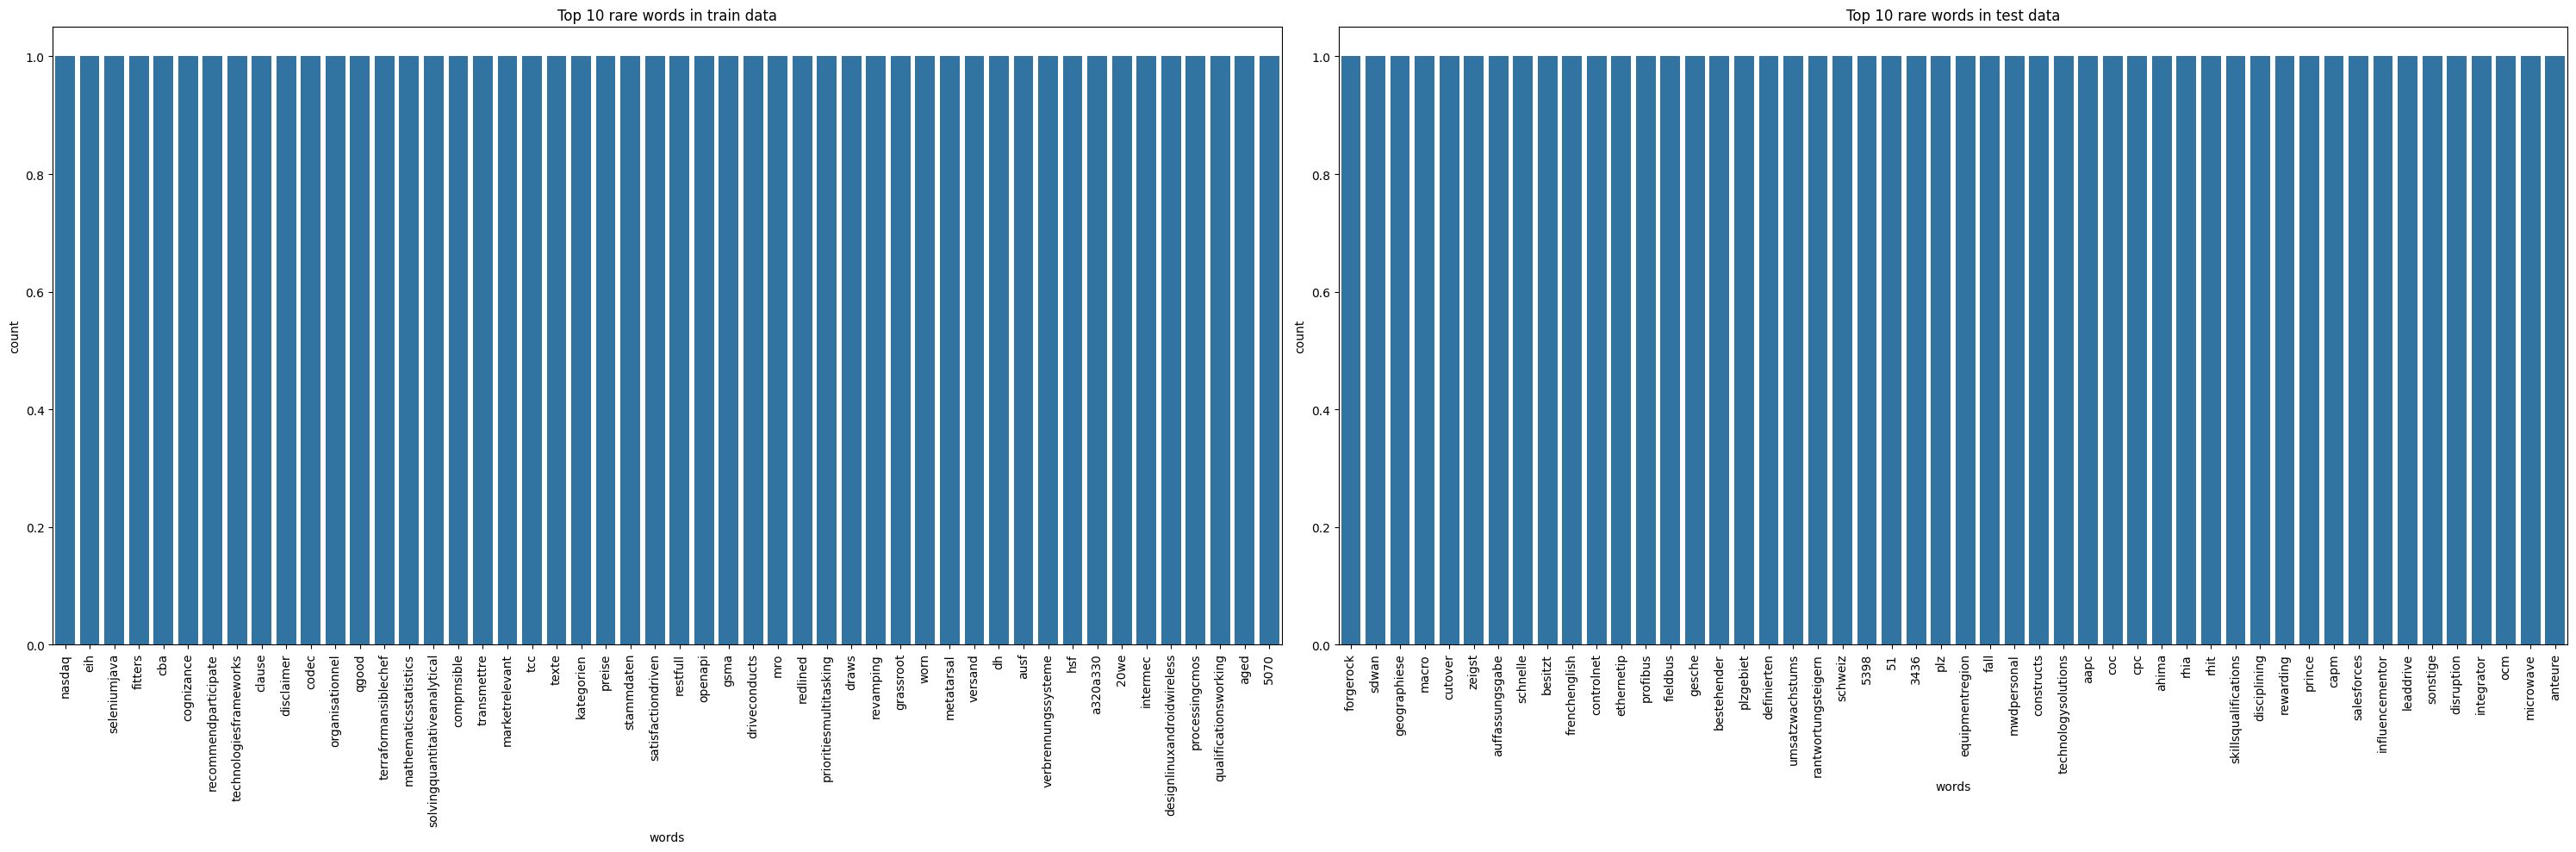

In [34]:
# Membuat visualisasi untuk kata yang jarang muncul
train_words_df = pd.DataFrame(train_words.most_common()[:-51:-1], columns=['words', 'count'])
test_words_df = pd.DataFrame(test_words.most_common()[:-51:-1], columns=['words', 'count'])

# Membuat visualisasi agar lebih mudah dibaca atas dan bawah
fig, ax = plt.subplots(1, 2, figsize=(30, 10))

# Plot untuk data train
sns.barplot(x='words', y='count', data=train_words_df, ax=ax[0])
ax[0].set_title('Top 10 rare words in train data')
ax[0].tick_params(axis='x', rotation=90)  # Memutar label

# Plot untuk data test
sns.barplot(x='words', y='count', data=test_words_df, ax=ax[1])
ax[1].set_title('Top 10 rare words in test data')
ax[1].tick_params(axis='x', rotation=90)  # Memutar label

plt.tight_layout()  # Menyesuaikan tata letak agar tidak tumpang tindih
plt.show()

### Data Describe

In [35]:
# drop missing value
df_train_eda = df_train_eda.dropna()

In [36]:
df_train_eda.describe(include=object)

,Sentence_id,New_Sentence,Type
count,59002,59002,59002
unique,58597,54545,6
top,GERSKL18669,dummy block text representing nothing,responsibility
freq,2,852,15257


### Univariate Analysis

#### 1. Distribusi Kalimat

In [37]:
#membuat histogram
fig = go.Figure(data=[go.Histogram(x=df_train_eda['Length'], nbinsx=20, marker_color='lightsalmon')])

# membuat label di chart
fig.update_traces(texttemplate='%{x}', textposition='outside')

#menambahkan judul
fig.update_layout(
    title_text='Distribution of sentence length in train data',
    xaxis_title_text='Length',
    yaxis_title_text='Frequency',
    yaxis=dict(range=[0, 5000]),
    bargap=0.05,  # gap between bars of adjacent location coordinates
)

fig.show()

#### 2. Frekuensi tiap kategori

In [38]:
# Menghitung frekuensi setiap kategori pada kolom Type
type_freq = df_train_eda['Type'].value_counts()

# Membuat pie chart
fig = go.Figure(
    data=[go.Pie(
        labels=type_freq.index,
        values=type_freq.values,
        hole=.3,
        marker_colors=px.colors.qualitative.Pastel
    )])

# Menambahkan label dalam bentuk persentase
fig.update_traces(textinfo='percent+label')

# Menambahkan judul dan mengatur ukuran
fig.update_layout(
    title_text='Distribution of Type in train data',
    title_x=0.5,
    width=800,
    height=800
)

#### 3. Cek class imbalance

In [39]:
# Menghitung frekuensi setiap kategori pada kolom Type dalam bentuk persentase
type_freq_percent = df_train_eda['Type'].value_counts(normalize=True) * 100

# Membuat bar chart horizontal
fig = go.Figure(
    data=[go.Bar(
        x=type_freq_percent.values,
        y=type_freq_percent.index,
        orientation='h',
        marker_color='lightsalmon'
    )])

# Menambahkan label dalam bentuk persentase
fig.update_traces(texttemplate='%{x:.2f}%', textposition='inside')

# Menambahkan judul dan mengatur ukuran dan urutkan dari nilai terbesar
fig.update_layout(
    title_text='Distribution of Type in train data',
    title_x=0.5,
    xaxis_title_text='Percentage',
    yaxis_title_text='Type',
    yaxis=dict(categoryorder='total ascending'),
    width=800,
    height=800
)

fig.show()

#### 4. Cek Frekuensi keyword (New_Sentence) Terbanyak di tiap kategori

In [40]:
# mengunduh stopwords
nltk.download('stopwords')
nltk.download('punkt')

# mengatur stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /Users/tatas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/tatas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [41]:
# Fungsi untuk membersihkan dan tokenisasi teks
def clean_text(text, custom_stopwords=None):
    # Mengubah teks menjadi huruf kecil
    text = text.lower()
    # Tokenisasi kata
    words = word_tokenize(text)
    # Menghapus stopwords
    if custom_stopwords:
        stop_words.update(custom_stopwords)
    words_cleaned = [word for word in words if word.isalpha() and word not in stop_words]
    return words_cleaned

In [42]:
# Fungsi untuk menampilkan WordCloud dan Histogram Frekuensi Kata per kategori
def analyze_category(df, category, custom_stopwords=None):
    """
    Menampilkan WordCloud dan histogram frekuensi kata untuk kategori tertentu.
    Args:
    - df (pd.DataFrame): DataFrame yang berisi teks.
    - category (str): Kategori untuk dianalisis.
    - custom_stopwords (list): Daftar kata tambahan untuk dihapus.
    """
    # Filter data untuk kategori yang diberikan
    filtered_text = ' '.join(df_train_eda[df_train_eda['Type'] == category]['New_Sentence'].dropna())
    
    # Bersihkan teks
    cleaned_words = clean_text(filtered_text, custom_stopwords=custom_stopwords)
    
    if not cleaned_words:
        print(f"Tidak ada kata yang tersisa setelah pembersihan untuk kategori: {category}")
        return
    
    # Membuat WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(cleaned_words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud untuk Kategori: {category}")
    plt.show()
    
    # Membuat Histogram Frekuensi Kata
    word_counts = Counter(cleaned_words)
    most_common_words = word_counts.most_common(10)  # Ambil 10 kata yang paling sering muncul
    
    # Menampilkan Histogram
    words, counts = zip(*most_common_words)
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts, color='skyblue')
    plt.title(f"10 Kata Teratas dalam Kategori: {category}")
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=45)
    plt.savefig(f'histogram_{category}.png')
    plt.show()

# Contoh penggunaan
custom_stopwords = {
    'Responsibility': ['work'],
    'Requirement': ['must', 'work', 'strong','required','able','working'],
    'Skill': ['understanding', 'working', 'strong','experience','knowledge','skilss','ability','good','using','etc','requirements'],
    'SoftSkill': ['skills', 'ability', 'strong', 'work', 'good', 'excellent','experince','business','environment'],
    'Education': ['field','degree','bachelors','related','experience','equivalent','certification','preferred','masters','bachelor','systems','discipline'],
    'Experience': ['minimum', 'working', 'least','experience','years','project','role','year']
}

for category, stopwords_to_add in custom_stopwords.items():
    print(f"Analisis untuk kategori: {category}")
    analyze_category(df_train_eda, category, custom_stopwords=stopwords_to_add)

Analisis untuk kategori: Responsibility
Tidak ada kata yang tersisa setelah pembersihan untuk kategori: Responsibility
Analisis untuk kategori: Requirement
Tidak ada kata yang tersisa setelah pembersihan untuk kategori: Requirement
Analisis untuk kategori: Skill
Tidak ada kata yang tersisa setelah pembersihan untuk kategori: Skill
Analisis untuk kategori: SoftSkill
Tidak ada kata yang tersisa setelah pembersihan untuk kategori: SoftSkill
Analisis untuk kategori: Education
Tidak ada kata yang tersisa setelah pembersihan untuk kategori: Education
Analisis untuk kategori: Experience
Tidak ada kata yang tersisa setelah pembersihan untuk kategori: Experience


### Multivariate Analysis

## Data Prepocessing

### 1. Handle Missing Value 

In [43]:
# check missing value
print('Missing value data train:')
print(df_train.isnull().sum())

Missing value data train:
Unnamed: 0         0
Sentence_id        0
New_Sentence    1113
Type               0
dtype: int64


In [44]:
# Handling missing value
df_train = df_train.dropna()

# check missing value
print('Missing value data train:')
print(df_train.isnull().sum())

Missing value data train:
Unnamed: 0      0
Sentence_id     0
New_Sentence    0
Type            0
dtype: int64


### 2. Hapus Kolom tidak Relevan

In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59002 entries, 0 to 60114
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    59002 non-null  int64 
 1   Sentence_id   59002 non-null  object
 2   New_Sentence  59002 non-null  object
 3   Type          59002 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [46]:
# remove kolom yang tidak digunakan
df_train = df_train.drop(columns=['Unnamed: 0'])

In [47]:
df_train.head()

,Sentence_id,New_Sentence,Type
0,GERRES15609,author and/or review architecture/design and o...,responsibility
1,PHERES15784,should be able to develop custom dynamic shape...,responsibility
2,GERREQ10457,experience in working crosslly with a larger ...,requirement
3,GERSKL27235,"previous business experience, including but no...",skill
4,HONSSK18415,delivering fast and right the first time.,softskill


### 3. Stopword & puctuation

In [48]:
# fungsi remove stopwords
def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word not in stop]
    return ' '.join(words)

# remove stopwords
df_train['New_Sentence'] = df_train['New_Sentence'].apply(remove_stopwords)

In [49]:
# fungsi remove punctuation and special characters regex true
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

# remove punctuation
df_train['New_Sentence'] = df_train['New_Sentence'].apply(remove_punctuation)

In [50]:
df_train.head()

,Sentence_id,New_Sentence,Type
0,GERRES15609,author andor review architecturedesign technic...,responsibility
1,PHERES15784,able develop custom dynamic shape object scrip...,responsibility
2,GERREQ10457,experience working crosslly larger engineering...,requirement
3,GERSKL27235,previous business experience including limited...,skill
4,HONSSK18415,delivering fast right first time,softskill


### 4. Tokenization

In [51]:
# fungsi tokenisasi kolom New_Sentence dan simpan di kolom baru word
def identify_tokens(row):
    review = row['New_Sentence']
    tokens = word_tokenize(review)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

df_train['words'] = df_train.apply(identify_tokens, axis=1)
df_train.head()


,Sentence_id,New_Sentence,Type,words
0,GERRES15609,author andor review architecturedesign technic...,responsibility,"[author, andor, review, architecturedesign, te..."
1,PHERES15784,able develop custom dynamic shape object scrip...,responsibility,"[able, develop, custom, dynamic, shape, object..."
2,GERREQ10457,experience working crosslly larger engineering...,requirement,"[experience, working, crosslly, larger, engine..."
3,GERSKL27235,previous business experience including limited...,skill,"[previous, business, experience, including, li..."
4,HONSSK18415,delivering fast right first time,softskill,"[delivering, fast, right, first, time]"


In [52]:
# remove stop words
stop_words = set(stopwords.words('english'))

def remove_stops(row):
    my_list = row['words']
    meaningful_words = [w for w in my_list if not w in stop_words]
    return (meaningful_words)

df_train['meaningful'] = df_train.apply(remove_stops, axis=1)
df_train.head()

,Sentence_id,New_Sentence,Type,words,meaningful
0,GERRES15609,author andor review architecturedesign technic...,responsibility,"[author, andor, review, architecturedesign, te...","[author, andor, review, architecturedesign, te..."
1,PHERES15784,able develop custom dynamic shape object scrip...,responsibility,"[able, develop, custom, dynamic, shape, object...","[able, develop, custom, dynamic, shape, object..."
2,GERREQ10457,experience working crosslly larger engineering...,requirement,"[experience, working, crosslly, larger, engine...","[experience, working, crosslly, larger, engine..."
3,GERSKL27235,previous business experience including limited...,skill,"[previous, business, experience, including, li...","[previous, business, experience, including, li..."
4,HONSSK18415,delivering fast right first time,softskill,"[delivering, fast, right, first, time]","[delivering, fast, right, first, time]"


## Feature Engineering

### Stemming and Lemmatization

In [53]:
# stemming 
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

def stem_list(row):
    my_list = row['meaningful']
    stemmed_list = [stemming.stem(word) for word in my_list]
    return (stemmed_list)

df_train['stemmed_words'] = df_train.apply(stem_list, axis=1)
df_train.head()

,Sentence_id,New_Sentence,Type,words,meaningful,stemmed_words
0,GERRES15609,author andor review architecturedesign technic...,responsibility,"[author, andor, review, architecturedesign, te...","[author, andor, review, architecturedesign, te...","[author, andor, review, architecturedesign, te..."
1,PHERES15784,able develop custom dynamic shape object scrip...,responsibility,"[able, develop, custom, dynamic, shape, object...","[able, develop, custom, dynamic, shape, object...","[abl, develop, custom, dynam, shape, object, s..."
2,GERREQ10457,experience working crosslly larger engineering...,requirement,"[experience, working, crosslly, larger, engine...","[experience, working, crosslly, larger, engine...","[experi, work, crosslli, larger, engin, organ,..."
3,GERSKL27235,previous business experience including limited...,skill,"[previous, business, experience, including, li...","[previous, business, experience, including, li...","[previou, busi, experi, includ, limit, busi, m..."
4,HONSSK18415,delivering fast right first time,softskill,"[delivering, fast, right, first, time]","[delivering, fast, right, first, time]","[deliv, fast, right, first, time]"


In [54]:
# lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lem_list(row):
    my_list = row['meaningful']
    lem_list = [lemmatizer.lemmatize(word) for word in my_list]
    return (lem_list)

df_train['lemmatized_words'] = df_train.apply(lem_list, axis=1)
df_train.head()

[nltk_data] Downloading package wordnet to /Users/tatas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Sentence_id,New_Sentence,Type,words,meaningful,stemmed_words,lemmatized_words
0,GERRES15609,author andor review architecturedesign technic...,responsibility,"[author, andor, review, architecturedesign, te...","[author, andor, review, architecturedesign, te...","[author, andor, review, architecturedesign, te...","[author, andor, review, architecturedesign, te..."
1,PHERES15784,able develop custom dynamic shape object scrip...,responsibility,"[able, develop, custom, dynamic, shape, object...","[able, develop, custom, dynamic, shape, object...","[abl, develop, custom, dynam, shape, object, s...","[able, develop, custom, dynamic, shape, object..."
2,GERREQ10457,experience working crosslly larger engineering...,requirement,"[experience, working, crosslly, larger, engine...","[experience, working, crosslly, larger, engine...","[experi, work, crosslli, larger, engin, organ,...","[experience, working, crosslly, larger, engine..."
3,GERSKL27235,previous business experience including limited...,skill,"[previous, business, experience, including, li...","[previous, business, experience, including, li...","[previou, busi, experi, includ, limit, busi, m...","[previous, business, experience, including, li..."
4,HONSSK18415,delivering fast right first time,softskill,"[delivering, fast, right, first, time]","[delivering, fast, right, first, time]","[deliv, fast, right, first, time]","[delivering, fast, right, first, time]"


### Feature enginee

In [55]:
# Feature tambahan panjang kata dan jumlah kata
df_train['Length'] = df_train['New_Sentence'].apply(len)
df_train['Word_Count'] = df_train['New_Sentence'].apply(lambda x: len(str(x).split()))

In [56]:
df_train.head()

,Sentence_id,New_Sentence,Type,words,meaningful,stemmed_words,lemmatized_words,Length,Word_Count
0,GERRES15609,author andor review architecturedesign technic...,responsibility,"[author, andor, review, architecturedesign, te...","[author, andor, review, architecturedesign, te...","[author, andor, review, architecturedesign, te...","[author, andor, review, architecturedesign, te...",151,17
1,PHERES15784,able develop custom dynamic shape object scrip...,responsibility,"[able, develop, custom, dynamic, shape, object...","[able, develop, custom, dynamic, shape, object...","[abl, develop, custom, dynam, shape, object, s...","[able, develop, custom, dynamic, shape, object...",75,10
2,GERREQ10457,experience working crosslly larger engineering...,requirement,"[experience, working, crosslly, larger, engine...","[experience, working, crosslly, larger, engine...","[experi, work, crosslli, larger, engin, organ,...","[experience, working, crosslly, larger, engine...",89,10
3,GERSKL27235,previous business experience including limited...,skill,"[previous, business, experience, including, li...","[previous, business, experience, including, li...","[previou, busi, experi, includ, limit, busi, m...","[previous, business, experience, including, li...",130,14
4,HONSSK18415,delivering fast right first time,softskill,"[delivering, fast, right, first, time]","[delivering, fast, right, first, time]","[deliv, fast, right, first, time]","[delivering, fast, right, first, time]",32,5


In [57]:
# # extract verb and noun
# def extract_pos(text):
#     words = word_tokenize(text)
#     pos = nltk.pos_tag(words)
#     verb = [word for word, p in pos if p in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']]
#     noun = [word for word, p in pos if p in ['NN', 'NNS', 'NNP', 'NNPS']]
#     return verb, noun

# df_train['Verb'], df_train['Noun'] = zip(*df_train['New_Sentence'].apply(extract_pos))
# df_train.head()

In [58]:
# Tambahkan skor sentimen (positif, negatif, atau netral) sebagai fitur tambahan
from textblob import TextBlob

df_train['sentiment_score'] = df_train['New_Sentence'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_train.head()

,Sentence_id,New_Sentence,Type,words,meaningful,stemmed_words,lemmatized_words,Length,Word_Count,sentiment_score
0,GERRES15609,author andor review architecturedesign technic...,responsibility,"[author, andor, review, architecturedesign, te...","[author, andor, review, architecturedesign, te...","[author, andor, review, architecturedesign, te...","[author, andor, review, architecturedesign, te...",151,17,0.080000
1,PHERES15784,able develop custom dynamic shape object scrip...,responsibility,"[able, develop, custom, dynamic, shape, object...","[able, develop, custom, dynamic, shape, object...","[abl, develop, custom, dynam, shape, object, s...","[able, develop, custom, dynamic, shape, object...",75,10,0.250000
2,GERREQ10457,experience working crosslly larger engineering...,requirement,"[experience, working, crosslly, larger, engine...","[experience, working, crosslly, larger, engine...","[experi, work, crosslli, larger, engin, organ,...","[experience, working, crosslly, larger, engine...",89,10,0.053333
3,GERSKL27235,previous business experience including limited...,skill,"[previous, business, experience, including, li...","[previous, business, experience, including, li...","[previou, busi, experi, includ, limit, busi, m...","[previous, business, experience, including, li...",130,14,-0.119048
4,HONSSK18415,delivering fast right first time,softskill,"[delivering, fast, right, first, time]","[delivering, fast, right, first, time]","[deliv, fast, right, first, time]","[delivering, fast, right, first, time]",32,5,0.245238


## Evaluation Feature

In [59]:
data_corr = df_train.copy()

In [60]:
data_corr.head()

,Sentence_id,New_Sentence,Type,words,meaningful,stemmed_words,lemmatized_words,Length,Word_Count,sentiment_score
0,GERRES15609,author andor review architecturedesign technic...,responsibility,"[author, andor, review, architecturedesign, te...","[author, andor, review, architecturedesign, te...","[author, andor, review, architecturedesign, te...","[author, andor, review, architecturedesign, te...",151,17,0.080000
1,PHERES15784,able develop custom dynamic shape object scrip...,responsibility,"[able, develop, custom, dynamic, shape, object...","[able, develop, custom, dynamic, shape, object...","[abl, develop, custom, dynam, shape, object, s...","[able, develop, custom, dynamic, shape, object...",75,10,0.250000
2,GERREQ10457,experience working crosslly larger engineering...,requirement,"[experience, working, crosslly, larger, engine...","[experience, working, crosslly, larger, engine...","[experi, work, crosslli, larger, engin, organ,...","[experience, working, crosslly, larger, engine...",89,10,0.053333
3,GERSKL27235,previous business experience including limited...,skill,"[previous, business, experience, including, li...","[previous, business, experience, including, li...","[previou, busi, experi, includ, limit, busi, m...","[previous, business, experience, including, li...",130,14,-0.119048
4,HONSSK18415,delivering fast right first time,softskill,"[delivering, fast, right, first, time]","[delivering, fast, right, first, time]","[deliv, fast, right, first, time]","[delivering, fast, right, first, time]",32,5,0.245238


In [61]:
# label encoding untuk kolom Type
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
data_corr['Type'] = label.fit_transform(data_corr['Type'])

In [62]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# encoding untuk kolom words, meaningful, stemmed_words, dan lemmatized_words
data_corr['words_encoded'] = data_corr['words'].apply(lambda x: ' '.join(x))
data_corr['meaningful_encoded'] = data_corr['meaningful'].apply(lambda x: ' '.join(x))
data_corr['stemmed_words_encoded'] = data_corr['stemmed_words'].apply(lambda x: ' '.join(x))
data_corr['lemmatized_words_encoded'] = data_corr['lemmatized_words'].apply(lambda x: ' '.join(x))

data_corr['words_encoded'] = label_encoder.fit_transform(data_corr['words_encoded'])
data_corr['meaningful_encoded'] = label_encoder.fit_transform(data_corr['meaningful_encoded'])
data_corr['stemmed_words_encoded'] = label_encoder.fit_transform(data_corr['stemmed_words_encoded'])
data_corr['lemmatized_words_encoded'] = label_encoder.fit_transform(data_corr['lemmatized_words_encoded'])

In [63]:
data_corr.head(20)

,Sentence_id,New_Sentence,Type,words,meaningful,stemmed_words,lemmatized_words,Length,Word_Count,sentiment_score,words_encoded,meaningful_encoded,stemmed_words_encoded,lemmatized_words_encoded
0,GERRES15609,author andor review architecturedesign technic...,3,"[author, andor, review, architecturedesign, te...","[author, andor, review, architecturedesign, te...","[author, andor, review, architecturedesign, te...","[author, andor, review, architecturedesign, te...",151,17,0.080000,5204,5189,5159,5172
1,PHERES15784,able develop custom dynamic shape object scrip...,3,"[able, develop, custom, dynamic, shape, object...","[able, develop, custom, dynamic, shape, object...","[abl, develop, custom, dynam, shape, object, s...","[able, develop, custom, dynamic, shape, object...",75,10,0.250000,2669,2654,2640,2648
2,GERREQ10457,experience working crosslly larger engineering...,2,"[experience, working, crosslly, larger, engine...","[experience, working, crosslly, larger, engine...","[experi, work, crosslli, larger, engin, organ,...","[experience, working, crosslly, larger, engine...",89,10,0.053333,20089,20056,19886,19957
3,GERSKL27235,previous business experience including limited...,4,"[previous, business, experience, including, li...","[previous, business, experience, including, li...","[previou, busi, experi, includ, limit, busi, m...","[previous, business, experience, including, li...",130,14,-0.119048,36689,36647,36369,36473
4,HONSSK18415,delivering fast right first time,5,"[delivering, fast, right, first, time]","[delivering, fast, right, first, time]","[deliv, fast, right, first, time]","[delivering, fast, right, first, time]",32,5,0.245238,11668,11638,11521,11585
5,INDRES9494,track department expenses capital budget,3,"[track, department, expenses, capital, budget]","[track, department, expenses, capital, budget]","[track, depart, expens, capit, budget]","[track, department, expense, capital, budget]",41,5,0.000000,46681,46629,46272,46408
6,HONRES51852,meet performance metrics,3,"[meet, performance, metrics]","[meet, performance, metrics]","[meet, perform, metric]","[meet, performance, metric]",24,3,0.000000,30614,30577,30351,30481
7,UAEREQ34683,must havebachelors degree engineering,2,"[must, havebachelors, degree, engineering]","[must, havebachelors, degree, engineering]","[must, havebachelor, degre, engin]","[must, havebachelors, degree, engineering]",37,4,0.000000,32893,32853,32598,32698
8,UAEREQ4612,covid19 ability travel manufacturing sites ohi...,2,"[ability, travel, manufacturing, sites, ohio, ...","[ability, travel, manufacturing, sites, ohio, ...","[abil, travel, manufactur, site, ohio, nebrask...","[ability, travel, manufacturing, site, ohio, n...",75,9,0.000000,1909,1895,1886,1890
9,INDEDU42721,six sigma qualification least green belt level,0,"[six, sigma, qualification, least, green, belt...","[six, sigma, qualification, least, green, belt...","[six, sigma, qualif, least, green, belt, level]","[six, sigma, qualification, least, green, belt...",46,7,-0.250000,42588,42542,42223,42346


<Axes: >

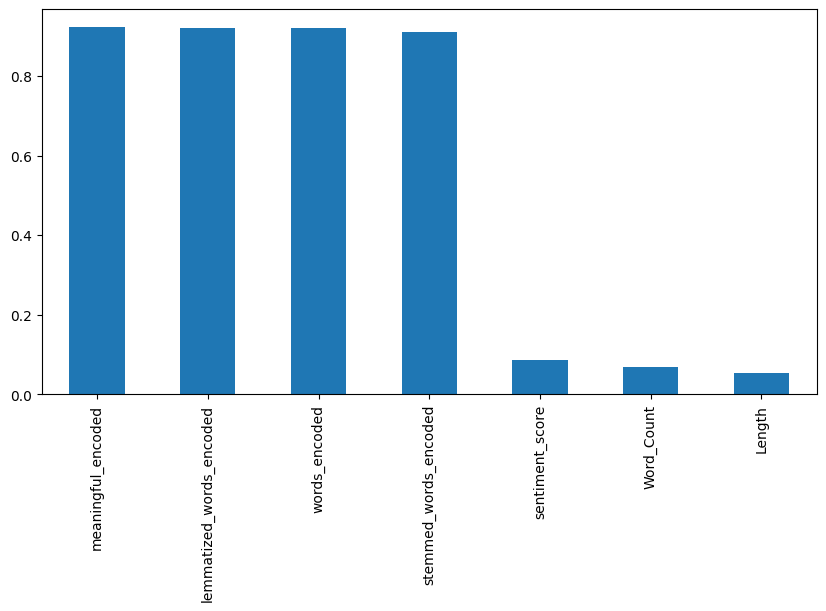

In [64]:
#mutual information
from sklearn.feature_selection import mutual_info_classif

X = data_corr[['Length', 'Word_Count', 'sentiment_score', 'words_encoded', 'meaningful_encoded', 'stemmed_words_encoded', 'lemmatized_words_encoded']]
y = data_corr['Type']

mi = mutual_info_classif(X, y, random_state=42)
mi = pd.Series(mi, index=X.columns)
mi = mi.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
mi.plot.bar()

In [65]:
# Create new DataFrame for the mutual information result
mi_df = pd.DataFrame(mi, columns=['Mutual Information'])
mi_df

,Mutual Information
meaningful_encoded,0.922078
lemmatized_words_encoded,0.921839
words_encoded,0.921436
stemmed_words_encoded,0.911473
sentiment_score,0.084837
Word_Count,0.067607
Length,0.054386


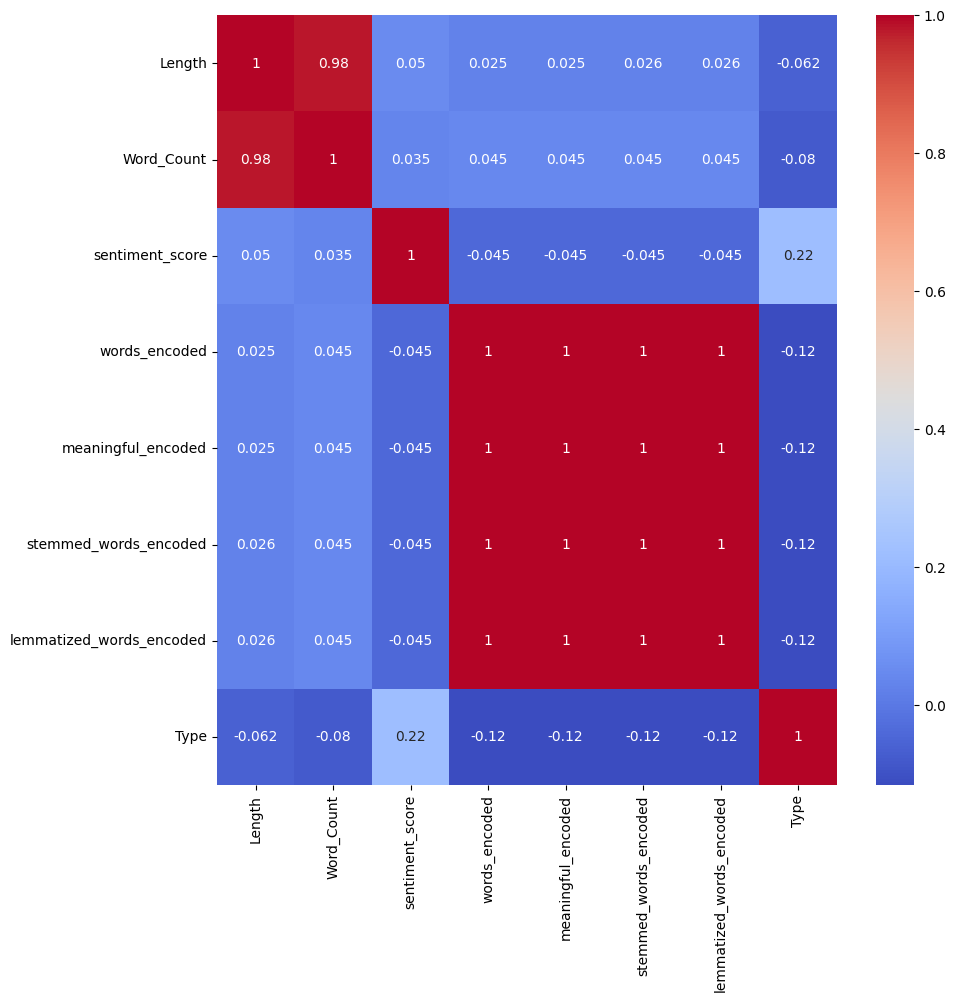

In [66]:
# correlation matrix
data_cor_vs = data_corr[['Length', 'Word_Count', 'sentiment_score', 'words_encoded', 'meaningful_encoded', 'stemmed_words_encoded', 'lemmatized_words_encoded', 'Type']]
corr = data_cor_vs.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [67]:
data_cor_vs.columns

Index(['Length', 'Word_Count', 'sentiment_score', 'words_encoded',
       'meaningful_encoded', 'stemmed_words_encoded',
       'lemmatized_words_encoded', 'Type'],
      dtype='object')

In [68]:
# data final for modeling kecuaili kolom sentiment_score
data_final = data_cor_vs.copy().drop(columns=['sentiment_score'])

In [69]:
# split data
X = data_final.drop(columns='Type')
y = data_final['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
#standarisasi
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
# initialize semua model algoritma yang akan digunakan termasuk RNN dan LSTM
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# initialize model
mlp = MLPClassifier()
lr = LogisticRegression()
svm = SVC(probability=True)
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
ab = AdaBoostClassifier()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
gnb = GaussianNB()
xgb = XGBClassifier()

models = [mlp, lr, svm, rf, gb, ab, dt, knn, gnb, xgb]

In [73]:
# model training and validation
def model_train_val(models, X_train, y_train):
    # list for results
    results = []
    names = []
    # set KFold
    kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    # iterate over models
    for model in models:
        # cross validation
        cv_results = cross_validate(model, X_train, y_train, cv=kfold, scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc_ovr_weighted'])
        results.append(cv_results)
        names.append(model.__class__.__name__)
    return results, names

results, names = model_train_val(models, X_train, y_train)

# print results
for i in range(len(results)):
    print(f"{names[i]}: Accuracy: {results[i]['test_accuracy'].mean()}, Precision: {results[i]['test_precision_weighted'].mean()}, Recall: {results[i]['test_recall_weighted'].mean()}, F1 Score: {results[i]['test_f1_weighted'].mean()}, ROC AUC: {results[i]['test_roc_auc_ovr_weighted'].mean()}")

MLPClassifier: Accuracy: 0.49092167075346727, Precision: 0.48182229526711307, Recall: 0.49092167075346727, F1 Score: 0.46541638820222875, ROC AUC: 0.7818982154478105
LogisticRegression: Accuracy: 0.36711079507717054, Precision: 0.3216523970163579, Recall: 0.36711079507717054, F1 Score: 0.32386138058060915, ROC AUC: 0.6762807834712573
SVC: Accuracy: 0.4418549063147351, Precision: 0.4112191139857613, Recall: 0.4418549063147351, F1 Score: 0.4081662142835084, ROC AUC: 0.7428665082943422
RandomForestClassifier: Accuracy: 0.6568079155881222, Precision: 0.651989764565934, Recall: 0.6568079155881222, F1 Score: 0.6530462289766336, ROC AUC: 0.8915326485813548
GradientBoostingClassifier: Accuracy: 0.5997965859359013, Precision: 0.607777657216922, Recall: 0.5997965859359013, F1 Score: 0.5784832430371873, ROC AUC: 0.8622260660755167
AdaBoostClassifier: Accuracy: 0.5056033939591943, Precision: 0.5092895803919472, Recall: 0.5056033939591943, F1 Score: 0.48173970656289067, ROC AUC: 0.7777673605483719
